<a href="https://colab.research.google.com/github/Sasidhar6/FML_LAB/blob/main/Logistic_Regression_On_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
#1. Import Packages, Functions and classes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
data=pd.read_csv("diabetes.csv")
data.head()


,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
data.tail()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [17]:
x=data.iloc[:,[0,1]]
y=data.iloc[:,8]

<Axes: >

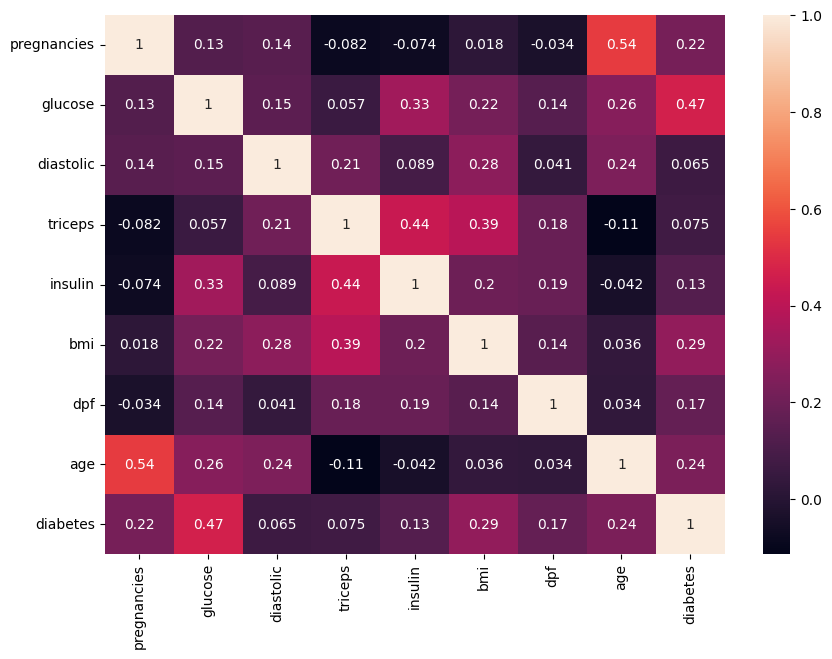

In [5]:
plt.figure(figsize=(10, 7))
sns.heatmap(data.corr(), annot=True)

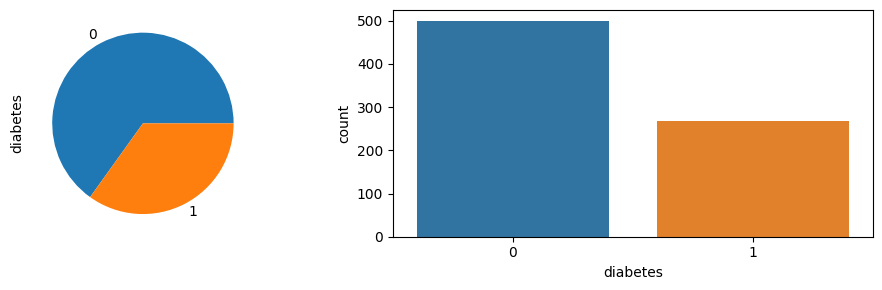

In [7]:
# Chart for distribution of target variable
fig= plt.figure(figsize=(10,3) )
fig.add_subplot(1,2,1)
a= data["diabetes"].value_counts(normalize=True).plot.pie()
fig.add_subplot(1,2,2)
churnchart=sns.countplot(x=data["diabetes"])
plt.tight_layout()
plt.show()


In [20]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  
print("train size X : ",x_train.shape)
print("train size y : ",y_train.shape)
print("test size X : ",x_test.shape)
print("test size y : ",y_test.shape)



train size X :  (576, 2)
train size y :  (576,)
test size X :  (192, 2)
test size y :  (192,)


In [21]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

In [22]:
#Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train)  

LogisticRegression(random_state=0)

In [29]:
LogisticRegression(C=1.0) 


LogisticRegression()

In [26]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [37]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)  
print(cm)

[[113  17]
 [ 31  31]]


<ipython-input-40-f827c65f537c>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


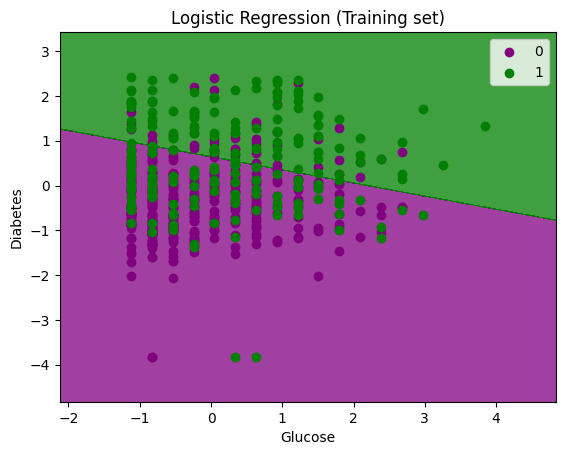

In [40]:
#Visualizing the training set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_train, y_train  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('purple','green' )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('purple', 'green'))(i), label = j)  
plt.title('Logistic Regression (Training set)')  
plt.xlabel('Glucose')  
plt.ylabel('Diabetes')  
plt.legend()  
plt.show()  

In [47]:
model = LogisticRegression(C=1.0)
model.fit(x,y)

LogisticRegression()

In [48]:
#4. Evaluate the model
model.predict_proba(x)

array([[0.38324489, 0.61675511],
       [0.92245652, 0.07754348],
       [0.11712201, 0.88287799],
       ...,
       [0.65668095, 0.34331905],
       [0.72231357, 0.27768643],
       [0.89839986, 0.10160014]])

In [49]:
#accuracy
model.score(x, y)

0.74609375

In [52]:
#more comprehensive report on the classification 
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       500
           1       0.69      0.50      0.58       268

    accuracy                           0.75       768
   macro avg       0.73      0.69      0.70       768
weighted avg       0.74      0.75      0.74       768

